In [1]:
#!pip install xgboost

In [2]:
import pandas as pd
#import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter('ignore')

In [4]:
loc = "http://football-data.co.uk/mmz4281/{}/E0.csv"
dataset = pd.DataFrame()
years = ['1314','1415','1516','1617']
for x in range(1,5):
    r1 = pd.read_csv(loc.format(years[x-1]), error_bad_lines=False, escapechar='\n')
    r1 = r1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','B365H','B365D','B365A','WHH','WHD','WHA','IWH','IWD','IWA']]
    dataset = dataset.append(r1)

In [5]:
dataset.shape

(1521, 29)

In [6]:
dataset.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AR,B365H,B365D,B365A,WHH,WHD,WHA,IWH,IWD,IWA
0,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,16.0,9.0,...,0.0,1.44,4.75,8.0,1.36,4.8,8.50,1.37,4.6,7.5
1,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,26.0,10.0,...,0.0,1.40,5.00,9.5,1.36,4.6,9.00,1.40,4.4,7.3
2,Norwich,Everton,2.0,2.0,D,0.0,0.0,D,8.0,19.0,...,0.0,3.20,3.40,2.4,3.10,3.3,2.30,2.90,3.3,2.3
3,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,D,20.0,5.0,...,0.0,2.30,3.40,3.4,2.20,3.3,3.30,2.20,3.2,3.2
4,Swansea,Man United,1.0,4.0,A,0.0,2.0,A,17.0,15.0,...,0.0,4.20,3.50,2.0,4.00,3.4,1.91,4.20,3.5,1.8


In [7]:
import os
from operator import itemgetter
import numpy as np

In [8]:
dataset = dataset.dropna()

In [9]:
Team_Names=np.unique(dataset[['HomeTeam', 'AwayTeam']].values)
Team_Names

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Burnley', 'Cardiff',
       'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Hull',
       'Leicester', 'Liverpool', 'Man City', 'Man United',
       'Middlesbrough', 'Newcastle', 'Norwich', 'QPR', 'Southampton',
       'Stoke', 'Sunderland', 'Swansea', 'Tottenham', 'Watford',
       'West Brom', 'West Ham'], dtype=object)

In [10]:
Team_Names_Assigning_Default_Values={i : 1500 for i in Team_Names}
Team_Names_Assigning_Default_Values

{'Arsenal': 1500,
 'Aston Villa': 1500,
 'Bournemouth': 1500,
 'Burnley': 1500,
 'Cardiff': 1500,
 'Chelsea': 1500,
 'Crystal Palace': 1500,
 'Everton': 1500,
 'Fulham': 1500,
 'Hull': 1500,
 'Leicester': 1500,
 'Liverpool': 1500,
 'Man City': 1500,
 'Man United': 1500,
 'Middlesbrough': 1500,
 'Newcastle': 1500,
 'Norwich': 1500,
 'QPR': 1500,
 'Southampton': 1500,
 'Stoke': 1500,
 'Sunderland': 1500,
 'Swansea': 1500,
 'Tottenham': 1500,
 'Watford': 1500,
 'West Brom': 1500,
 'West Ham': 1500}

In [11]:
dataset.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AR,B365H,B365D,B365A,WHH,WHD,WHA,IWH,IWD,IWA
0,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,16.0,9.0,...,0.0,1.44,4.75,8.0,1.36,4.8,8.50,1.37,4.6,7.5
1,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,26.0,10.0,...,0.0,1.40,5.00,9.5,1.36,4.6,9.00,1.40,4.4,7.3
2,Norwich,Everton,2.0,2.0,D,0.0,0.0,D,8.0,19.0,...,0.0,3.20,3.40,2.4,3.10,3.3,2.30,2.90,3.3,2.3
3,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,D,20.0,5.0,...,0.0,2.30,3.40,3.4,2.20,3.3,3.30,2.20,3.2,3.2
4,Swansea,Man United,1.0,4.0,A,0.0,2.0,A,17.0,15.0,...,0.0,4.20,3.50,2.0,4.00,3.4,1.91,4.20,3.5,1.8


In [12]:
Team_Names_Assigning_Default_Values.keys()

dict_keys(['Arsenal', 'Aston Villa', 'Bournemouth', 'Burnley', 'Cardiff', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Hull', 'Leicester', 'Liverpool', 'Man City', 'Man United', 'Middlesbrough', 'Newcastle', 'Norwich', 'QPR', 'Southampton', 'Stoke', 'Sunderland', 'Swansea', 'Tottenham', 'Watford', 'West Brom', 'West Ham'])

In [13]:
import math
def Points(data):
    I=25
    FTR=str(data.FTR)
    HomeTeam=str(data.HomeTeam)
    AwayTeam=str(data.AwayTeam)
    Pbefore_H=int(Team_Names_Assigning_Default_Values[HomeTeam])
    Pbefore_A=int(Team_Names_Assigning_Default_Values[AwayTeam]) 
    
    if FTR == "H":
            
        Points_of_HomeTeam= Pbefore_H + I * (1- (1/(10 **(-((Team_Names_Assigning_Default_Values[HomeTeam])-(Team_Names_Assigning_Default_Values[AwayTeam]))/600)+1)))
        Points_of_AwayTeam= Pbefore_A +  I * (0- (1/(10 **(-((Team_Names_Assigning_Default_Values[AwayTeam])-(Team_Names_Assigning_Default_Values[HomeTeam]))/600)+1)))
        
        Pafter_H=int(Points_of_HomeTeam)
        Pafter_A=int(Points_of_AwayTeam)
        
        for l in Team_Names_Assigning_Default_Values:
            if l == HomeTeam :
                Team_Names_Assigning_Default_Values[l] = Points_of_HomeTeam
        for j in Team_Names_Assigning_Default_Values:
            if j == AwayTeam :
                Team_Names_Assigning_Default_Values[j] = Points_of_AwayTeam
                        
           
        return((pd.Series([Pbefore_H,Pbefore_A,Pafter_H,Pafter_A])))
    elif FTR == "A":
            
        Points_of_AwayTeam= Pbefore_A + I * (1- (1/(10 **(-((Team_Names_Assigning_Default_Values[AwayTeam])-(Team_Names_Assigning_Default_Values[HomeTeam]))/600)+1)))
        Points_of_HomeTeam= Pbefore_H + I * (0- (1/(10 **(-((Team_Names_Assigning_Default_Values[HomeTeam])-(Team_Names_Assigning_Default_Values[AwayTeam]))/600)+1)))
       
        Pafter_H=int(Points_of_HomeTeam)
        Pafter_A=int(Points_of_AwayTeam)
        
        for m in Team_Names_Assigning_Default_Values:
            if m == HomeTeam :
                Team_Names_Assigning_Default_Values[m] = Points_of_HomeTeam
        for n in Team_Names_Assigning_Default_Values:
            if n == AwayTeam :
                Team_Names_Assigning_Default_Values[n] = Points_of_AwayTeam
                        
           
        return((pd.Series([Pbefore_H,Pbefore_A,Pafter_H,Pafter_A])))  
    else:
        
        Points_of_AwayTeam= Pbefore_A +  I * (0.5 - (1/(10 **(-((Team_Names_Assigning_Default_Values[AwayTeam])-(Team_Names_Assigning_Default_Values[HomeTeam]))/600)+1))) 
        Points_of_HomeTeam= Pbefore_H + I * (0.5 - (1/(10 **(-((Team_Names_Assigning_Default_Values[HomeTeam])-(Team_Names_Assigning_Default_Values[AwayTeam]))/600)+1)))
       
        Pafter_H=int(Points_of_HomeTeam)
        Pafter_A=int(Points_of_AwayTeam)
        
        for p in Team_Names_Assigning_Default_Values:
            if p == HomeTeam :
                Team_Names_Assigning_Default_Values[p] = Points_of_HomeTeam
        for q in Team_Names_Assigning_Default_Values:
            if q == AwayTeam :
                Team_Names_Assigning_Default_Values[q] = Points_of_AwayTeam
                        
           
        return((pd.Series([Pbefore_H,Pbefore_A,Pafter_H,Pafter_A]))) 
dataset[["Pbefore_H","Pbefore_A","Pafter_H","Pafter_A"]]=dataset.apply(Points,axis=1)
dataset

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,WHH,WHD,WHA,IWH,IWD,IWA,Pbefore_H,Pbefore_A,Pafter_H,Pafter_A
0,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,16.0,9.0,...,1.36,4.80,8.50,1.37,4.60,7.50,1487,1512,1475,1523
1,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,26.0,10.0,...,1.36,4.60,9.00,1.40,4.40,7.30,1500,1500,1512,1487
2,Norwich,Everton,2.0,2.0,D,0.0,0.0,D,8.0,19.0,...,3.10,3.30,2.30,2.90,3.30,2.30,1500,1500,1500,1500
3,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,D,20.0,5.0,...,2.20,3.30,3.30,2.20,3.20,3.20,1500,1500,1487,1512
4,Swansea,Man United,1.0,4.0,A,0.0,2.0,A,17.0,15.0,...,4.00,3.40,1.91,4.20,3.50,1.80,1500,1500,1487,1512
5,West Brom,Southampton,0.0,1.0,A,0.0,0.0,D,11.0,7.0,...,2.25,3.30,3.20,2.20,3.30,3.10,1500,1500,1487,1512
6,West Ham,Cardiff,2.0,0.0,H,1.0,0.0,H,18.0,12.0,...,1.95,3.50,3.80,1.90,3.45,3.80,1500,1500,1512,1487
7,Chelsea,Hull,2.0,0.0,H,2.0,0.0,H,22.0,7.0,...,1.20,6.00,15.00,1.20,5.80,13.00,1500,1500,1512,1487
8,Crystal Palace,Tottenham,0.0,1.0,A,0.0,0.0,D,5.0,17.0,...,4.75,3.60,1.75,4.20,3.50,1.80,1500,1500,1487,1512
9,Man City,Newcastle,4.0,0.0,H,2.0,0.0,H,20.0,5.0,...,1.29,5.50,10.00,1.30,5.00,9.00,1500,1500,1512,1487


In [14]:
train_dup = dataset.copy()

In [15]:
train_dup = train_dup.dropna()

In [16]:
train_dup.shape

(1519, 33)

In [17]:
le = LabelEncoder()
train_dup['FTR'] = le.fit_transform(train_dup['FTR'].astype(str))

X1 = train_dup.drop(['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTR','HTHG','HTAG'], axis=1)
Y1 = train_dup.FTR

In [18]:
X1.head()

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,WHH,WHD,WHA,IWH,IWD,IWA,Pbefore_H,Pbefore_A,Pafter_H,Pafter_A
0,16.0,9.0,4.0,4.0,15.0,18.0,4.0,3.0,4.0,5.0,...,1.36,4.8,8.50,1.37,4.6,7.5,1487,1512,1475,1523
1,26.0,10.0,11.0,4.0,11.0,11.0,12.0,6.0,1.0,1.0,...,1.36,4.6,9.00,1.40,4.4,7.3,1500,1500,1512,1487
2,8.0,19.0,2.0,6.0,13.0,10.0,6.0,8.0,2.0,0.0,...,3.10,3.3,2.30,2.90,3.3,2.3,1500,1500,1500,1500
3,20.0,5.0,3.0,1.0,14.0,14.0,6.0,1.0,0.0,3.0,...,2.20,3.3,3.30,2.20,3.2,3.2,1500,1500,1487,1512
4,17.0,15.0,6.0,7.0,13.0,10.0,7.0,4.0,1.0,3.0,...,4.00,3.4,1.91,4.20,3.5,1.8,1500,1500,1487,1512


In [19]:
X1.shape

(1519, 25)

In [20]:
Y1.shape

(1519,)

In [21]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=123)

In [22]:
# Create a random forest classifier
clf1 = RandomForestClassifier(n_estimators=5000, random_state=0, n_jobs=-1)

# Train the classifier
clf1.fit(X1_train, Y1_train)

# Print the name and gini importance of each feature
for feature in zip(X1.columns, clf1.feature_importances_):
    print(feature)

('HS', 0.04159528030775206)
('AS', 0.04461112637022399)
('HST', 0.06296533467658966)
('AST', 0.06023929995887951)
('HF', 0.03591210694464376)
('AF', 0.03767662100645221)
('HC', 0.04277611651999514)
('AC', 0.0421459525906117)
('HY', 0.02616073598410661)
('AY', 0.02515542425403405)
('HR', 0.008009304607893425)
('AR', 0.007102179408350031)
('B365H', 0.04370437165505843)
('B365D', 0.027723022256372656)
('B365A', 0.039449080641016175)
('WHH', 0.038160721866983695)
('WHD', 0.027428474412138634)
('WHA', 0.04142123981489575)
('IWH', 0.04041493303260908)
('IWD', 0.023893161592800787)
('IWA', 0.04652745538667558)
('Pbefore_H', 0.05742046238654672)
('Pbefore_A', 0.0528186755388927)
('Pafter_H', 0.06332795750200093)
('Pafter_A', 0.06336096128447576)


In [23]:
df = dataset.copy()
df=df.dropna()

In [24]:
table = pd.DataFrame(columns=('Team','HTGS','ATGS','HAS','AAS','HTGC','ATGC','HDS','ADS'))

avg_home_scored = df.FTHG.sum() / 1519.0
avg_away_scored = df.FTAG.sum() / 1519.0
avg_home_conceded = avg_away_scored
avg_away_conceded = avg_home_scored
print(avg_home_scored)

1.5345622119815667


In [25]:
res_home = df.groupby('HomeTeam')
res_away = df.groupby('AwayTeam')

In [26]:
#res_home.get_group('Arsenal')
#res_home.size()
#res_home.filter(lambda x: any(x['HomeTeam'] == 'Arsenal'))

In [27]:
df[df['HomeTeam']=='Arsenal'].shape

(76, 33)

In [28]:
table.Team = res_home.groups.keys()
table.HTGS = res_home.FTHG.sum().values
table.HTGC = res_home.FTAG.sum().values
table.ATGS = res_away.FTAG.sum().values
table.ATGC = res_away.FTHG.sum().values
#19 Home matches for each team per season and 4 seasons therefore 76 home matches and 76 away matches
table.HAS = (table.HTGS / 76.0) / avg_home_scored
table.AAS = (table.ATGS / 76.0) / avg_away_scored
table.HDS = (table.HTGC / 76.0) / avg_home_conceded
table.ADS = (table.ATGC / 76.0) / avg_away_conceded

table.head()

,Team,HTGS,ATGS,HAS,AAS,HTGC,ATGC,HDS,ADS
0,Arsenal,147.0,131.0,1.260431,1.469291,52.0,104.0,0.583230,0.891734
1,Aston Villa,54.0,43.0,0.463016,0.482286,89.0,105.0,0.998221,0.900308
2,Bournemouth,58.0,42.0,0.497313,0.471070,63.0,71.0,0.706606,0.608780
3,Burnley,40.0,27.0,0.342975,0.302831,41.0,67.0,0.459854,0.574482
4,Cardiff,20.0,12.0,0.171487,0.134592,35.0,39.0,0.392559,0.334400


In [29]:
df.shape

(1519, 33)

In [30]:
#Extract necessary features from the data file
feature_table = df.iloc[:,:34]

In [31]:
feature_table=feature_table.dropna()

In [32]:
feature_table.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,WHH,WHD,WHA,IWH,IWD,IWA,Pbefore_H,Pbefore_A,Pafter_H,Pafter_A
0,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,16.0,9.0,...,1.36,4.8,8.50,1.37,4.6,7.5,1487,1512,1475,1523
1,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,26.0,10.0,...,1.36,4.6,9.00,1.40,4.4,7.3,1500,1500,1512,1487
2,Norwich,Everton,2.0,2.0,D,0.0,0.0,D,8.0,19.0,...,3.10,3.3,2.30,2.90,3.3,2.3,1500,1500,1500,1500
3,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,D,20.0,5.0,...,2.20,3.3,3.30,2.20,3.2,3.2,1500,1500,1487,1512
4,Swansea,Man United,1.0,4.0,A,0.0,2.0,A,17.0,15.0,...,4.00,3.4,1.91,4.20,3.5,1.8,1500,1500,1487,1512


In [33]:
#Full Time Result(FTR), Home Shots on Target(HST), Away Shots on Target(AST), Home Corners(HC), Away Corners(AC)
feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST','HC','AC','B365H','B365A','B365D','WHH','WHD','WHA','IWH','IWD','IWA','Pbefore_H','Pbefore_A','Pafter_H','Pafter_A']]

#Home Attacking Strength(HAS), Home Defensive Strength(HDS), Away Attacking Strength(AAS), Away Defensive Strength(ADS)
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table[table['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table[table['Team'] == row['AwayTeam']]['ADS'].values[0])

feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS
feature_table.head()

,HomeTeam,AwayTeam,FTR,HST,AST,HC,AC,B365H,B365A,B365D,...,IWD,IWA,Pbefore_H,Pbefore_A,Pafter_H,Pafter_A,HAS,HDS,AAS,ADS
0,Arsenal,Aston Villa,A,4.0,4.0,4.0,3.0,1.44,8.0,4.75,...,4.6,7.5,1487,1512,1475,1523,1.260431,0.583230,0.482286,0.900308
1,Liverpool,Stoke,H,11.0,4.0,12.0,6.0,1.40,9.5,5.00,...,4.4,7.3,1500,1500,1512,1487,1.380473,0.874845,0.785117,1.037498
2,Norwich,Everton,D,2.0,6.0,6.0,8.0,3.20,2.4,3.40,...,3.3,2.3,1500,1500,1500,1500,0.368698,0.538366,0.987005,0.874585
3,Sunderland,Fulham,A,3.0,1.0,6.0,1.0,2.30,3.4,3.40,...,3.2,3.2,1500,1500,1487,1512,0.651652,1.211324,0.179455,0.402995
4,Swansea,Man United,A,6.0,7.0,7.0,4.0,4.20,2.0,3.50,...,3.5,1.8,1500,1500,1487,1512,0.917457,1.144028,1.188892,0.745970


In [34]:
#feature_table[(feature_table['HomeTeam']=='Arsenal') & (feature_table['AwayTeam']=='Aston Villa')]

In [35]:
def transformResult(row):
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [36]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)
feature_table.tail(20)

,HomeTeam,AwayTeam,FTR,HST,AST,HC,AC,B365H,B365A,B365D,...,IWA,Pbefore_H,Pbefore_A,Pafter_H,Pafter_A,HAS,HDS,AAS,ADS,Result
360,Stoke,Arsenal,A,4.0,6.0,7.0,6.0,4.75,1.75,4.10,...,1.70,1413,1636,1405,1643,0.900308,0.975789,1.469291,0.891734,-1
361,Sunderland,Swansea,A,4.0,3.0,8.0,4.0,4.20,1.91,3.80,...,1.85,1286,1383,1275,1393,0.651652,1.211324,0.897277,1.054647,-1
362,Crystal Palace,Hull,H,4.0,0.0,3.0,7.0,2.10,3.75,3.60,...,3.80,1367,1322,1378,1310,0.703098,1.099164,0.459854,0.891734,1
363,Tottenham,Man United,H,7.0,2.0,8.0,3.0,1.73,5.25,3.90,...,4.20,1696,1632,1706,1621,1.226134,0.796333,1.188892,0.745970,1
364,West Ham,Liverpool,A,3.0,11.0,4.0,6.0,5.25,1.70,4.00,...,1.70,1443,1621,1434,1629,0.883159,1.132812,1.491723,0.960329,-1
365,Chelsea,Watford,H,9.0,3.0,8.0,3.0,1.25,13.00,6.75,...,8.00,1720,1371,1725,1365,1.423344,0.751469,0.392559,0.600205,1
366,Arsenal,Sunderland,H,13.0,2.0,17.0,3.0,1.09,29.00,13.00,...,20.00,1643,1275,1647,1270,1.260431,0.583230,0.818765,1.166113,1
367,Man City,West Brom,H,10.0,2.0,7.0,1.0,1.14,23.00,9.00,...,18.00,1661,1404,1667,1397,1.637703,0.729037,0.706606,0.926031,1
368,Southampton,Man United,D,6.0,1.0,7.0,3.0,2.75,2.80,3.30,...,2.95,1477,1621,1480,1617,1.071795,0.886061,1.188892,0.745970,0
369,Leicester,Tottenham,A,5.0,12.0,4.0,4.0,4.50,1.85,3.80,...,2.00,1496,1706,1488,1713,0.805990,0.729037,1.401995,0.805990,-1


In [37]:
#Two sets of training sets - adding features.
X_train = feature_table[['HAS','HDS','AAS','ADS','B365H','B365A','B365D','WHH','WHD','WHA','IWH','IWD','IWA','Pbefore_H','Pbefore_A','Pafter_H','Pafter_A']]
X_train_2 = feature_table[['HAS','HDS','AAS','ADS','B365H','B365A','B365D','WHH','WHD','WHA','IWH','IWD','IWA','HST','AST','HC','AC','Pbefore_H','Pbefore_A','Pafter_H','Pafter_A']]
y_train = feature_table['Result']
display(X_train.tail())
display(X_train_2.tail())

,HAS,HDS,AAS,ADS,B365H,B365A,B365D,WHH,WHD,WHA,IWH,IWD,IWA,Pbefore_H,Pbefore_A,Pafter_H,Pafter_A
375,1.380473,0.874845,0.112160,0.257231,1.14,23.00,9.0,1.10,9.00,26.00,1.15,7.5,18.00,1629,1350,1635,1343
376,1.054647,0.639310,0.975789,0.986052,2.50,3.10,3.3,2.50,3.30,2.80,2.40,3.3,2.95,1617,1378,1624,1370
377,1.071795,0.886061,0.785117,1.037498,1.80,4.75,3.8,1.75,3.75,4.50,1.70,3.7,5.00,1480,1405,1465,1419
378,0.917457,1.144028,0.706606,0.926031,2.10,3.75,3.5,2.05,3.50,3.50,2.00,3.4,3.80,1393,1397,1405,1384
379,0.385846,0.538366,1.626314,0.771693,11.00,1.30,6.0,10.00,5.50,1.29,11.00,5.0,1.30,1365,1667,1359,1672


,HAS,HDS,AAS,ADS,B365H,B365A,B365D,WHH,WHD,WHA,...,IWD,IWA,HST,AST,HC,AC,Pbefore_H,Pbefore_A,Pafter_H,Pafter_A
375,1.380473,0.874845,0.112160,0.257231,1.14,23.00,9.0,1.10,9.00,26.00,...,7.5,18.00,10.0,3.0,3.0,3.0,1629,1350,1635,1343
376,1.054647,0.639310,0.975789,0.986052,2.50,3.10,3.3,2.50,3.30,2.80,...,3.3,2.95,2.0,1.0,3.0,6.0,1617,1378,1624,1370
377,1.071795,0.886061,0.785117,1.037498,1.80,4.75,3.8,1.75,3.75,4.50,...,3.7,5.00,6.0,3.0,4.0,10.0,1480,1405,1465,1419
378,0.917457,1.144028,0.706606,0.926031,2.10,3.75,3.5,2.05,3.50,3.50,...,3.4,3.80,2.0,5.0,7.0,4.0,1393,1397,1405,1384
379,0.385846,0.538366,1.626314,0.771693,11.00,1.30,6.0,10.00,5.50,1.29,...,5.0,1.30,3.0,9.0,4.0,5.0,1365,1667,1359,1672


In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.svm import SVC
from sklearn import linear_model

In [39]:
nbb_scores = []
nbb_scores_2 = []

for i in range(0,1000,50):
    clf1 = MultinomialNB(alpha=i)
    clf1.fit(X_train,y_train)
    clf1.fit(X_train_2,y_train)
    scores = cross_val_score(clf1, X_train, y_train, cv=10)
    scores_2 = cross_val_score(clf1, X_train_2, y_train, cv=10)
    print ("NB alpha ",i," ", scores.mean(), " : ", scores_2.mean())
    
    nbb_scores.append(scores.mean())  
    nbb_scores_2.append(scores_2.mean())

NB alpha  0   0.5358124012620353  :  0.5470490645638781
NB alpha  50   0.5358253022683137  :  0.5476940582944417
NB alpha  100   0.5397857414457274  :  0.5496550112487721
NB alpha  150   0.5437463503732239  :  0.554243186231684
NB alpha  200   0.55161579445302  :  0.556827687822808
NB alpha  250   0.5548925368810347  :  0.5601260450946752
NB alpha  300   0.5535981925011203  :  0.5607839398315174
NB alpha  350   0.5515512894216277  :  0.5647443790089312
NB alpha  400   0.5528970680765732  :  0.5581692793090494
NB alpha  450   0.552290777364845  :  0.556818973985234
NB alpha  500   0.5502954783104661  :  0.56010426050074
NB alpha  550   0.5496332266548369  :  0.5581476644651967
NB alpha  600   0.5522520743460095  :  0.5587926581957603
NB alpha  650   0.5528970680765731  :  0.5581304065401312
NB alpha  700   0.5555159157677456  :  0.5614244068932114
NB alpha  750   0.557472511803289  :  0.5627618112107482
NB alpha  800   0.5607750562438606  :  0.5647398523400614
NB alpha  850   0.56009990

In [40]:
clf = [MultinomialNB(alpha=850), SVC(kernel = 'linear', C=1.5, probability=True), LogisticRegression()]

labels = [ 'Naive Bayes', 'SVM', 'Log regres']

mean_scores = []
mean_scores_2 = []
cms = []

for i in range(0,3):

    clf[i].fit(X_train,y_train)
    clf[i].fit(X_train_2,y_train)

    scores = cross_val_score(clf[i], X_train, y_train, cv=10)
    scores_2 = cross_val_score(clf[i], X_train_2, y_train, cv=10)
    print (labels[i]," : ", scores.mean(), " : ", scores_2.mean())
    
    mean_scores.append(scores.mean())  
    mean_scores_2.append(scores_2.mean())

Naive Bayes  :  0.560099903581953  :  0.5640819576032194
SVM  :  1.0  :  1.0
Log regres  :  1.0  :  1.0


In [41]:
feature_table.head()

,HomeTeam,AwayTeam,FTR,HST,AST,HC,AC,B365H,B365A,B365D,...,IWA,Pbefore_H,Pbefore_A,Pafter_H,Pafter_A,HAS,HDS,AAS,ADS,Result
0,Arsenal,Aston Villa,A,4.0,4.0,4.0,3.0,1.44,8.0,4.75,...,7.5,1487,1512,1475,1523,1.260431,0.583230,0.482286,0.900308,-1
1,Liverpool,Stoke,H,11.0,4.0,12.0,6.0,1.40,9.5,5.00,...,7.3,1500,1500,1512,1487,1.380473,0.874845,0.785117,1.037498,1
2,Norwich,Everton,D,2.0,6.0,6.0,8.0,3.20,2.4,3.40,...,2.3,1500,1500,1500,1500,0.368698,0.538366,0.987005,0.874585,0
3,Sunderland,Fulham,A,3.0,1.0,6.0,1.0,2.30,3.4,3.40,...,3.2,1500,1500,1487,1512,0.651652,1.211324,0.179455,0.402995,-1
4,Swansea,Man United,A,6.0,7.0,7.0,4.0,4.20,2.0,3.50,...,1.8,1500,1500,1487,1512,0.917457,1.144028,1.188892,0.745970,-1


In [42]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
mod = sm.OLS(y_train,X_train_2)
results = mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Result   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.247e+04
Date:                Sat, 31 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:38:47   Log-Likelihood:                 3408.7
No. Observations:                1519   AIC:                            -6775.
Df Residuals:                    1498   BIC:                            -6663.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HAS            0.0097      0.004      2.672      0.0

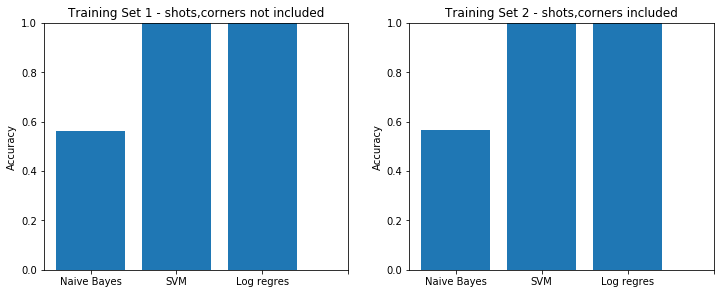

In [43]:
fig = plt.figure(figsize = (12,10))

ax = fig.add_subplot(2,2,1)

ax.bar(range(0,3),mean_scores,align='center');
ax.set_xticks(range(4));
ax.set_xticks(range(4));
ax.set_ylim(0,1);
ax.set_ylabel("Accuracy")
ax.set_title("Training Set 1 - shots,corners not included")
ax.set_xticklabels(labels);

ax2 = fig.add_subplot(2,2,2);
ax2.bar(range(0,3),mean_scores_2,align='center');
ax2.set_xticks(range(4))
ax2.set_ylabel("Accuracy")
ax2.set_ylim(0,1);
ax2.set_title("Training Set 2 - shots,corners included")
ax2.set_xticklabels(labels);

In [44]:
#from sklearn.preprocessing import normalize
#X_train = normalize(X_train)
#X_train_2 = normalize(X_train_2)
#pd.set_option('display.expand_frame_repr', False)

#display(X_train)

In [45]:
#nbb_scores = []
#nbb_scores_2 = []

#for i in range(0,1000,50):
#    clf1 = MultinomialNB(alpha=i)
#    clf1.fit(X_train,y_train)
#    clf1.fit(X_train_2,y_train)
#    scores = cross_val_score(clf1, X_train, y_train, cv=10)
#    scores_2 = cross_val_score(clf1, X_train_2, y_train, cv=10)
#    print ("NB alpha ",i," ", scores.mean(), " : ", scores_2.mean())
    
#    nbb_scores.append(scores.mean())  
#    nbb_scores_2.append(scores_2.mean())

In [46]:
#With Normalization
#clf = [MultinomialNB(alpha=0), SVC(kernel = 'linear', C=1.5, probability=True), LogisticRegression()]

#labels = [ 'Naive Bayes', 'SVM', 'Log regres']

#mean_scores = []
#mean_scores_2 = []
#cms = []

#for i in range(0,3):

#    clf[i].fit(X_train,y_train)
#    clf[i].fit(X_train_2,y_train)

#    scores = cross_val_score(clf[i], X_train, y_train, cv=10)
#    scores_2 = cross_val_score(clf[i], X_train_2, y_train, cv=10)
#    print (labels[i]," : ", scores.mean(), " : ", scores_2.mean())
    
#    mean_scores.append(scores.mean())  
#    mean_scores_2.append(scores_2.mean())

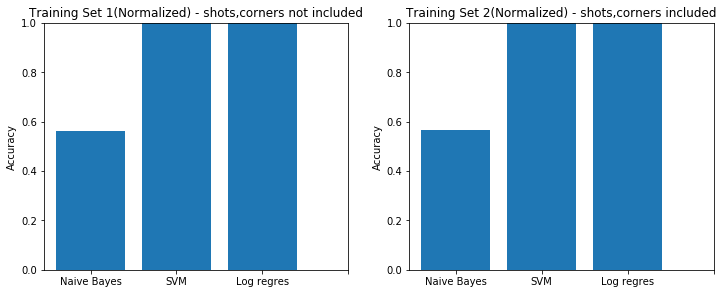

In [47]:
fig = plt.figure(figsize = (12,10))

ax = fig.add_subplot(2,2,1)

ax.bar(range(0,3),mean_scores,align='center');
ax.set_xticks(range(4));
ax.set_xticks(range(4));
ax.set_ylim(0,1);
ax.set_ylabel("Accuracy")
ax.set_title("Training Set 1(Normalized) - shots,corners not included")
ax.set_xticklabels(labels);

ax2 = fig.add_subplot(2,2,2);
ax2.bar(range(0,3),mean_scores_2,align='center');
ax2.set_xticks(range(4))
ax2.set_ylabel("Accuracy")
ax2.set_ylim(0,1);
ax2.set_title("Training Set 2(Normalized) - shots,corners included")
ax2.set_xticklabels(labels);
